# Data wrangling and datetimes

Dates and times are a special kind of data type. In this notebook, we will keep exploring the `orders` and `orderlines` datasets from Eniac and learn to deal with them. 

In [ ]:
import pandas as pd

url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' # orderlines.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


## Data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


Two variables need to be modified: 

* `unit_price`: it is detected as an object but it has to be a float. Why is that happening? 
* `date`: needs to be transformed to a date-time format. 

For the moment we will only focus on the `date`. Since it contains both the date and the time, we will transform the data type using the pandas method `.to_datetime()`: 

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [ ]:
df = (
df
    .assign(date = pd.to_datetime(df['date']))
#    .info()
)

In [ ]:
df.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


You can count the quantity of observations with `.value_counts()`.

In [ ]:
df['sku'].value_counts().head(15)

MIC0036    6282
APP1216    5627
APP0662    5445
APP1190    5039
APP0663    3942
MMW0016    2429
SAT0054    2172
APP1214    1884
APP1221    1872
SAT0053    1722
APP0698    1622
APP1922    1611
APP1020    1429
APP0927    1378
APP0666    1364
Name: sku, dtype: int64

**Exercise**: check whether the dates from the `orderlines` dataset match with the dates on the `orders` dataset.

In [ ]:
import pandas as  pd 
url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' # orderlines.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

print(path)
orderlines = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' # orders.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

https://drive.google.com/uc?export=download&id=14Y7g5ITyf6LMyPoKc9wr010V9StaCUux


In [ ]:
# code here

# don't worry if you cannot solve this exercise completely on your own
# your instructor will solve it with you
# but give it a try :)

In [ ]:
orderlines.sample(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date
231311,1549444,486485,0,1,AP20434,1.225.59,2018-01-09 11:23:35
6177,1136057,305266,0,1,WDT0354,79.99,2017-01-09 00:00:06


In [ ]:
orders.head(2)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed


In [ ]:
# check if orders id exists on both df
orders['order_id'].isin(orderlines['id_order']).sum()

204696

In [ ]:
orders.shape

(226909, 4)

* Problems between orders and orderlines. Not matching the orders id.

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
# check total price in orders match total price orderlines
# pd.to_numeric(orderlines['unit_price'])

# 1. create a new col total price in orderlines = unit price * qty

# 2. compare sum of orders and orderlines

* Solve problem unit price orderlines (maybe dot problem?)

In [ ]:
# check dates
(
orders
    .assign(created_date = pd.to_datetime(orders['created_date']))
    .agg({'created_date':['min','max']})
)

,created_date
min,2017-01-01 00:07:19
max,2018-03-14 13:58:36


In [ ]:
(
orderlines
    .assign(date = pd.to_datetime(orderlines['date']))
    .agg({'date':['min','max']})
)

,date
min,2017-01-01 00:07:19
max,2018-03-14 13:58:36


In [ ]:
# checking missing dates from orderlines to orders
(
orderlines
    .assign(date_exist = orderlines['date'].isin(orders['created_date']))
    .query("date_exist == False")
)

,id,id_order,product_id,product_quantity,sku,unit_price,date,date_exist
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27,False
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,False
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,False
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,False
11,1119126,299549,0,1,PAC0929,2.565.99,2017-01-01 02:07:42,False
...,...,...,...,...,...,...,...,...
293968,1650186,525853,0,1,OWC0035-2,71.89,2018-03-14 13:52:18,False
293970,1650189,527391,0,1,SAT0008,49.99,2018-03-14 13:53:31,False
293971,1650190,527392,0,1,ZAG0024,34.99,2018-03-14 13:53:44,False
293976,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02,False


## Aggregating with pandas

* Grouping and aggregating is one of the main ways to explore data. The main tools to do that with pandas are:
    * [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).
    * [`pandas.DataFrame.agg()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html?highlight=agg#pandas.DataFrame.agg) 
        * [`pandas.DataFrame.count()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)

In [ ]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


How many products do we have on each sku?

In [ ]:
(df
    .groupby('sku')
    # ['sku']
    # .count()
    .agg(
        {'product_quantity':'count'}
        #  count = ('product_quantity','count')
         )
    )

,product_quantity
sku,
8MO0001-A,2
8MO0003-A,3
8MO0007,29
8MO0008,30
8MO0009,28
...,...
ZAG0041,2
ZAG0042,1
ZEP0007,5


In [ ]:
pd.Series(['kldjfks', 2, ['kljdjs','kjsdfkl'], 4])

0              kldjfks
1                    2
2    [kljdjs, kjsdfkl]
3                    4
dtype: object

In [ ]:
col1 = pd.Series(['kldsjdsa','kljkldjs'])
col2 = pd.Series([1, 2, 3])

pd.DataFrame({
    'name_col1':col1,
    'name_col2':col2
})

,name_col1,name_col2
0,kldsjdsa,1
1,kljkldjs,2
2,NaN,3


In [ ]:
pd.concat([col1, col2], axis=1)

,0,1
0,kldsjdsa,1
1,kljkldjs,2
2,NaN,3


Different levels of aggregation answer different business questions:

- **count**: How many times has each product (identified by its `sku`) been purchased in an order? 

- **sum**: How many units of each product have been sold overall? 

- **mean**: How many units/order are sold for each product?

In [ ]:
temp = df.groupby('sku').agg({'product_quantity':['count', 'sum', 'mean']}).head()
temp

product_quantity              
                     count sum      mean
sku                                     
8MO0001-A                2   2  1.000000
8MO0003-A                3   3  1.000000
8MO0007                 29  30  1.034483
8MO0008                 30  31  1.033333
8MO0009                 28  30  1.071429

In [ ]:
temp.columns

MultiIndex([('product_quantity', 'count'),
            ('product_quantity',   'sum'),
            ('product_quantity',  'mean')],
           )

In [ ]:
temp[('product_quantity',   'sum')]

sku
8MO0001-A     2
8MO0003-A     3
8MO0007      30
8MO0008      31
8MO0009      30
Name: (product_quantity, sum), dtype: int64

`groupby` can also be combined with other pandas functions to analyse in more depth the datasets.

In [ ]:
df.groupby('sku')[['sku','product_quantity']].describe()

product_quantity                                             
                     count      mean       std  min  25%  50%  75%  max
sku                                                                    
8MO0001-A              2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
8MO0003-A              3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
8MO0007               29.0  1.034483  0.185695  1.0  1.0  1.0  1.0  2.0
8MO0008               30.0  1.033333  0.182574  1.0  1.0  1.0  1.0  2.0
8MO0009               28.0  1.071429  0.262265  1.0  1.0  1.0  1.0  2.0
...                    ...       ...       ...  ...  ...  ...  ...  ...
ZAG0041                2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
ZAG0042                1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
ZEP0007                5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
ZEP0008                1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
par0072               12.0  1.083333  0.288675  1.0  1.0  1.0  1.0  2.0

[7951 rows x 8 columns]

Now let's see how can we combine `.groupby()` and `.aggragate()` with `.sort_values()`.

I would like to see the top 10 most sold products on our data (total product quantity). 

In [ ]:
(
df
    .groupby('sku')['product_quantity']
    .sum()
    .sort_values(ascending=False).head(10)
)

sku
APP1190    6366
MIC0036    6316
APP1216    5648
APP0662    5487
APP0663    4164
MMW0016    2615
APP0698    2348
SAT0054    2322
APP1214    1985
WDT0183    1978
Name: product_quantity, dtype: int64

How can we sort values with multiple aggregated functions?

In [ ]:
(
df
    .groupby('sku')
    .agg({'product_quantity':['sum','count','std','mean','median']})
    .sort_values(by=('product_quantity','mean'), ascending=False)
)

product_quantity                                    
                       sum count         std       mean median
sku                                                           
APP1917                 32     1         NaN  32.000000   32.0
ADN0039                132     7   47.245559  18.857143    1.0
KIN0137                862    55  107.718263  15.672727    1.0
EVU0013                177    12   47.005077  14.750000    1.0
SEV0028               1122   122   90.353268   9.196721    1.0
...                    ...   ...         ...        ...    ...
APP1546                  1     1         NaN   1.000000    1.0
APP1546-A                4     4    0.000000   1.000000    1.0
MAK0009                  2     2    0.000000   1.000000    1.0
MAK0008                  1     1         NaN   1.000000    1.0
8MO0001-A                2     2    0.000000   1.000000    1.0

[7951 rows x 5 columns]

## Working with date time

We will start by creating a weekday column. You will have to combine two functions, [`pandas.DataFrame.assign()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html) from `pandas` and [`datetime.strftime()`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) from `datetime`.

First, let's talk about `.assign()`. It is a useful method for creating new columns:

In [ ]:
temp = pd.DataFrame({
    'col1':[1,2,3],
    'col2':[2,3,4],
    'col3':['abc','dft','gth']
})
temp

,col1,col2,col3
0,1,2,abc
1,2,3,dft
2,3,4,gth


In [ ]:
temp.assign(new_col = temp['col1'] + temp['col2'])

,col1,col2,col3,new_col
0,1,2,abc,3
1,2,3,dft,5
2,3,4,gth,7


In [ ]:
temp.assign(new_col = lambda df_: df_['col1'] + df_['col2'])

,col1,col2,col3,new_col
0,1,2,abc,3
1,2,3,dft,5
2,3,4,gth,7


In [ ]:
(temp
    .assign(new_col = temp['col1'] + temp['col2'])
    .assign(new_col_multiply = lambda df_: df_['col1'] * df_['new_col'])
)

,col1,col2,col3,new_col,new_col_multiply
0,1,2,abc,3,3
1,2,3,dft,5,10
2,3,4,gth,7,21


In [ ]:
temp2 = (temp
    .assign(new_col = temp['col1'] + temp['col2'])
)
temp2.assign(new_col_multiply = temp['col1'] * temp2['new_col'])

,col1,col2,col3,new_col,new_col_multiply
0,1,2,abc,3,3
1,2,3,dft,5,10
2,3,4,gth,7,21


In [ ]:
df.assign(new_colum = 'hi! I am a new column!').head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,new_colum
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,hi! I am a new column!
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,hi! I am a new column!
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,hi! I am a new column!
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,hi! I am a new column!
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,hi! I am a new column!


A new column often is the result of an operation between other columns in the dataframe:

In [ ]:
# df.assign(total_price = df['product_quantity'] * df['unit_price']).head()
df.assign(total_price = lambda df_: df_['product_quantity'] * df_['unit_price']).head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74


In [ ]:
# df.assign(last_character = lambda df_: df_['sku'].str.lower().str.count('app'))
df.assign(last_character = lambda df_: df_['sku'].str[-1])

,id,id_order,product_id,product_quantity,sku,unit_price,date,last_character
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,3
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,3
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,1
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,5
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,4
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,2
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,3
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,8
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,4


In Pandas, we can extract strings containing elements like the day of the month, the day of the week, the hour of the day... from `datetime` objects. We do so by using `dt.strftime()` in combination with `strftime` syntax. Find the cheat sheet for this syntax [here](https://strftime.org/). 

You'll understand it better with an example. Let's create the weekday column:

In [ ]:
df.assign(week_day = df['date'].dt.strftime('%A')).head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,week_day
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,Sunday
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,Sunday
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,Sunday
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,Sunday
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,Sunday


In [ ]:
df['date'].dt.strftime('%B')

0         January
1         January
2         January
3         January
4         January
           ...   
293978      March
293979      March
293980      March
293981      March
293982      March
Name: date, Length: 293983, dtype: object

Now we can sort weekdays by amount of sales:

In [ ]:
(
df
    .assign(week_day = df['date'].dt.strftime('%A'))
    .groupby('week_day')
    .agg({'product_quantity':['sum','count']})
    .sort_values(('product_quantity','sum'), ascending=False)
    # .loc['Sunday',:]
)

product_quantity       
                       sum  count
week_day                         
Monday               57624  50307
Wednesday            54131  47550
Tuesday              50871  44498
Friday               49566  44027
Thursday             48431  43634
Sunday               35667  32857
Saturday             33302  31110

Let's find out the top 1 product (in product quantity) by sku for each weekday:

In [ ]:
(
df
    .assign(week_day = df['date'].dt.strftime('%A'))
    .groupby(['week_day','sku'])
    .agg({'product_quantity':'sum'})
    .sort_values('product_quantity', ascending=False)
    .reset_index()
    .groupby('week_day')
    .head(1)
)

,week_day,sku,product_quantity
0,Friday,APP1190,1827
1,Thursday,MIC0036,1389
3,Tuesday,MIC0036,1213
6,Wednesday,SEV0028,1014
10,Monday,APP0663,840
14,Saturday,MIC0036,806
23,Sunday,APP1190,692


In [ ]:
df.date

0        2017-01-01 00:07:19
1        2017-01-01 00:19:45
2        2017-01-01 00:20:57
3        2017-01-01 00:51:40
4        2017-01-01 01:06:38
                 ...        
293978   2018-03-14 13:57:25
293979   2018-03-14 13:57:34
293980   2018-03-14 13:57:41
293981   2018-03-14 13:58:01
293982   2018-03-14 13:58:36
Name: date, Length: 293983, dtype: datetime64[ns]

When using `pd.to_datetime` to convert "objects" like "28-07-1990 03:30:15" to a proper data type, you have captured both the date and the time. Sometimes, you might only need the date (without the time). An easy way to do this is with `dt.date`:

In [ ]:
df['date'].dt.date.head(3)

0    2017-01-01
1    2017-01-01
2    2017-01-01
Name: date, dtype: object

In [ ]:
df['date'].dt.strftime('%A')

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
            ...    
293978    Wednesday
293979    Wednesday
293980    Wednesday
293981    Wednesday
293982    Wednesday
Name: date, Length: 293983, dtype: object

Link to offical documentation datetime library in pandas: 
https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components

In [ ]:
df['date'].dt.is_quarter_start

0          True
1          True
2          True
3          True
4          True
          ...  
293978    False
293979    False
293980    False
293981    False
293982    False
Name: date, Length: 293983, dtype: bool

Note that these are not actually strings, even thoguht the `dtype` that pandas displays for the whole column is `object`:

In [ ]:
df.date.dt.date[0]

datetime.date(2017, 1, 1)

In [ ]:
type(df.date.dt.date[0])

datetime.date

You can create these `datetime.date` objects from strings using the module `datetime`. This module has a handful of useful functions for dates and times, [check its documentation here](https://docs.python.org/3/library/datetime.html#date-objects).

In [ ]:
import datetime

datetime.date.fromisoformat("1990-07-28")

datetime.date(1990, 7, 28)

What we've outlined here is going to become useful and relevant whenever filtering a DataFrame by date, as you will see in the following challenges:

# CHALLENGES

**1. Which are the top 6 orders with the highest number of products sold?**

In [ ]:
# code here
(orderlines
  .groupby('id_order')
  .sum('product_quantity')
  .sort_values('product_quantity', ascending=False)
  .head(6)['product_quantity']
)

id_order
358747    1081
346221     999
349475     800
349133     555
484334     264
395611     256
Name: product_quantity, dtype: int64

**2. Which are the top 6 orders for the 1 of July of 2017?**

Combining `.assign()` with `.dt.date` will help you extract the date of a datetime column and use this information to filter it. Use the `datetime` module and its `date.fromisoformat()` method as we showed above.

Here is an example how to filter the first of January 2017.

In [ ]:
# Example
df_date = df.assign(date = df['date'].dt.date).copy()
df_date[df_date['date'] == datetime.date.fromisoformat('2017-01-01')]

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01
...,...,...,...,...,...,...,...
612,1120279,300119,0,1,JBL0107,94.99,2017-01-01
613,1120287,300126,0,1,LIF0112,61.74,2017-01-01
614,1120289,300127,0,1,EIZ0017,739.99,2017-01-01
615,1120290,300128,0,1,APP1195,1.193.99,2017-01-01


In [ ]:
# code here
(orderlines[orderlines.date.str.contains('2017-01-01')]
    .groupby('id_order')
    .agg({'product_quantity': 'sum'})
    .sort_values('product_quantity', ascending=False).head(6)
)

,product_quantity
id_order,
295310,10
300079,6
299600,6
299548,5
299978,5
300040,5


In [ ]:
(orderlines
    .assign(date =  pd.to_datetime(orderlines['date']))
    [lambda x: x.date.dt.date == datetime.date.fromisoformat('2017-01-01')]
    .groupby('id_order')
    .agg({'product_quantity': 'sum'})
    .sort_values('product_quantity', ascending=False)
    .head(6)
)

,product_quantity
id_order,
295310,10
300079,6
299600,6
299548,5
299978,5
300040,5


**3. Which is the month with the highest number of units sold?** 

Remember to look at the documentation of [`datetime.strftime()`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) 

In [ ]:
# code here
(orderlines
    .assign(date =  pd.to_datetime(orderlines['date']))
    .assign(month = lambda x: x.date.dt.strftime('%B'))
    .groupby('month')
    .agg({'product_quantity': 'sum'})
    .sort_values('product_quantity', ascending=False)
    .head(1)
)

,product_quantity
month,
January,66415


In the results there is an enormous differences between some months. Why do you think this is happening? Do we only have one year of data? In case you have multiple years, filter for only years that are complete to find out the best month for that year.

Tip: the output of the function `.dt.strftime()` is a string, so if you use it in a condition it will only match with strings!

In [ ]:
# code here
(orderlines
    .assign(date =  pd.to_datetime(orderlines['date']))
    [lambda x: x.date.dt.year == 2017]
    .assign(month = lambda x: x.date.dt.strftime('%B'))
    .groupby('month')
    .agg({'product_quantity': 'sum'})
    .sort_values('product_quantity', ascending=False).head(1)
)

,product_quantity
month,
November,46375


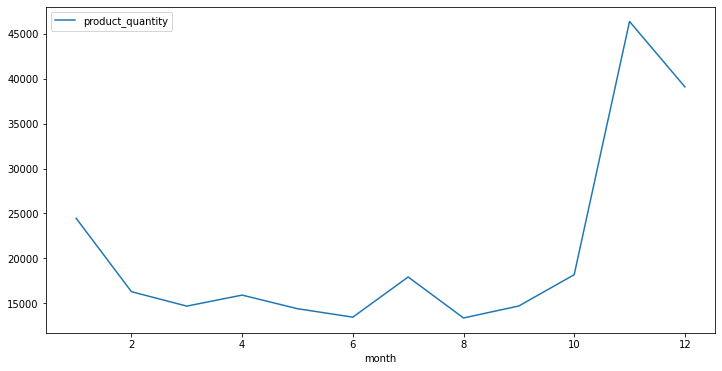

In [ ]:
(orderlines
    .assign(date =  pd.to_datetime(orderlines['date']))
    [lambda x: x.date.dt.year == 2017]
    .assign(month = lambda x: x.date.dt.month)
    .groupby('month')
    .agg({'product_quantity': 'sum'})
    .sort_values('month')
    .plot(figsize=(12,6))
)

In [ ]:
orderlines.date.dt.strftime('%B').unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [ ]:
month_cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

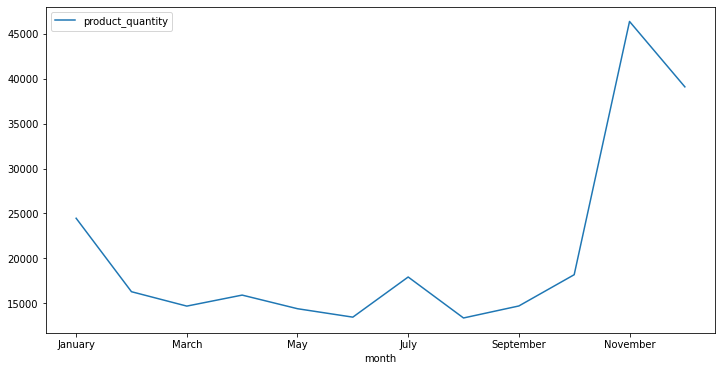

In [ ]:
(orderlines
    .assign(date =  pd.to_datetime(orderlines['date']))
    [lambda x: x.date.dt.year == 2017]
    .assign(month = lambda x: x.date.dt.strftime('%B'))
    .groupby(['month'])
    .agg({'product_quantity': 'sum'})
    .reset_index()
    .assign(month = lambda x: pd.Categorical(x['month'], categories= month_cats, ordered=True))
    .sort_values('month')
    .set_index('month')
    .plot(figsize=(12,6))
)

**4. For each month, find the day of the week with the highest amount of products sold** 

See below an example of the expected output.

In [ ]:
(orderlines
    .assign(date = lambda x: pd.to_datetime(x['date']), 
            #year = lambda x: x.date.dt.strftime('%Y'),
            month = lambda x: x.date.dt.strftime('%B'),
            #day = lambda x: x.date.dt.strftime('%d'),
            week_day = lambda x: x.date.dt.strftime('%A'))
    [lambda x: x.date.dt.year == 2017]
    .groupby(['month', 'week_day'])
    .agg({'product_quantity':'sum'})
    .sort_values(['month','product_quantity'], ascending=False)
    .groupby('month')
    .head(1)
    .sort_values('product_quantity', ascending=False)
)

,,product_quantity
month,week_day,
November,Friday,9717
December,Wednesday,7010
January,Monday,5420
July,Monday,4018
October,Monday,3849
May,Wednesday,3574
April,Tuesday,3286
February,Monday,3066
September,Friday,2893


second method

In [ ]:
(orderlines
    .assign(date = lambda x: pd.to_datetime(x['date']), 
            year = lambda x: x.date.dt.strftime('%Y'),
            month = lambda x: x.date.dt.strftime('%B'),
            week_day = lambda x: x.date.dt.strftime('%A'))
    .groupby(['year', 'month', 'week_day'])
    .agg({'product_quantity':'sum'})
    .sort_values(['year', 'month', 'product_quantity'], ascending=False)
    .groupby(['year', 'month'])
    .head(1)
    .sort_values(['year', 'product_quantity'], ascending=False)
)

product_quantity
year month     week_day                   
2018 January   Tuesday                8403
     February  Wednesday              4426
     March     Monday                 3005
2017 November  Friday                 9717
     December  Wednesday              7010
     January   Monday                 5420
     July      Monday                 4018
     October   Monday                 3849
     May       Wednesday              3574
     April     Tuesday                3286
     February  Monday                 3066
     September Friday                 2893
     August    Wednesday              2634
     March     Wednesday              2628
     June      Thursday               2572

In [ ]:
year_cats = orderlines.date.dt.strftime('%Y').unique()

In [ ]:
year_cats

array(['2017', '2018'], dtype=object)

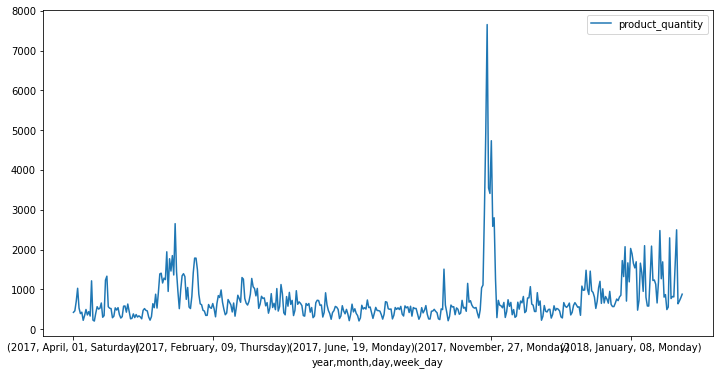

In [ ]:
# code here
(orderlines
    .assign(date = lambda x: pd.to_datetime(x['date']), 
            year = lambda x: x.date.dt.strftime('%Y'),
            month = lambda x: x.date.dt.strftime('%B'),
            day = lambda x: x.date.dt.strftime('%d'),
            week_day = lambda x: x.date.dt.strftime('%A'))
    .groupby(['year', 'month', 'day', 'week_day'])
    .agg({'product_quantity':'sum'})
    .plot(figsize=(12,6))
    #.sort_values(['product_quantity'])
)